# Deep Learning

Deep learning solutions for:
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

**Author: Oscar Miranda**


Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb
- https://developers.google.com/machine-learning/guides/text-classification/
- https://keras.io/api/datasets/boston_housing/


## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture.

### Load and prepare the data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

#### Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [ ]:
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 56ms/step - loss: 0.5299 - accuracy: 0.7736 - val_loss: 0.4042 - val_accuracy: 0.8494
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3242 - accuracy: 0.8910 - val_loss: 0.3163 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2398 - accuracy: 0.9200 - val_loss: 0.3026 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1951 - accuracy: 0.9357 - val_loss: 0.2789 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1639 - accuracy: 0.9453 - val_loss: 0.2769 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1393 - accuracy: 0.9547 - val_loss: 0.2877 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1190 - accuracy: 0.9633 - val_loss: 0.3051 - val_accuracy: 0.8780
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

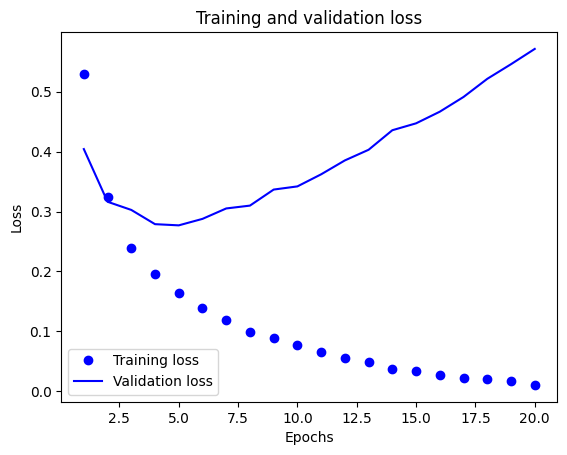

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

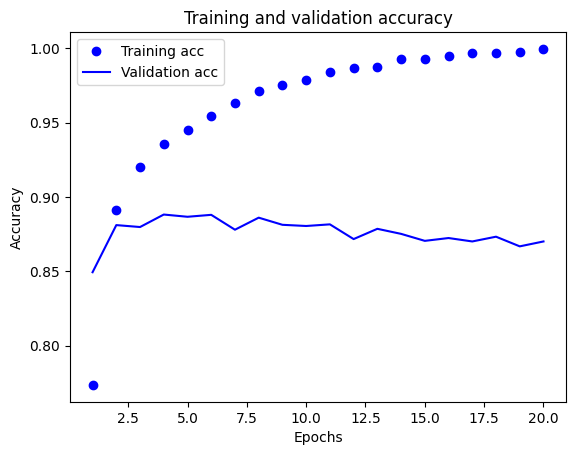

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model

In [ ]:
results = model1.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6115 - accuracy: 0.8604


In [ ]:
results

[0.6115061044692993, 0.8603600263595581]

## **PART 1**

#### **Part 1.1**

 **1.1.1**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

 The preprocessing that was applied was the vectorizing of the training data, training labels, test data, and test labels using multi-hot encoding. This is done because the neural network expects your data to be contiguous, clear structured input, or i.e., tensor-like.

 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

 The model does suffer from overfitting as we can see by the training and validation accuracy graph. My first suggestion would be to reduce the models complexity buy simplying it to help prevent overfitting e.g., reducing the number of layers or the number of neurons in each layer. Another suggestion would be to incorporate early stopping when the "sweet spot" is reach before the model begings to over fit or "memorize" the training data. Lastly, adding more data can help the model generalize better.

 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

 Yes, because the classes are balanced accuracy can be a good metric of success. Accuracy measures the proportion of correct predictions out of the total predictions.

#### **Part 1.2**

**1.2.1**

> Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [ ]:
# Your positive and negative code here and in additional cells as needed
# function using previous example
def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

# find a positive review (label 1) and a negative review (label 0)
positive_review_index = np.where(train_labels == 1)[0][0]
negative_review_index = np.where(train_labels == 0)[0][0]

print("Positive review:\n", decode_review(train_data[positive_review_index]))
print("\nNegative review:\n", decode_review(train_data[negative_review_index]))

Positive review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have 

**1.2.2**

> Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.


In [ ]:
# Your false pos/neg code here and in additional cells as needed
# Make predicitons
predictions = model1.predict(x_test)

# Convert predictions to binary labels
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# Find the indices of the false positive and false negative
false_positive_index = None
false_negative_index = None
for i, (true, pred) in enumerate(zip(y_test, binary_predictions)):
    if true == 0 and pred == 1:  # False Positive
        false_positive_index = i
        if false_negative_index is not None:
            break
    elif true == 1 and pred == 0:  # False Negative
        false_negative_index = i
        if false_positive_index is not None:
            break

# Print out the examples
print("False Positive:")
print("Predicted:", binary_predictions[false_positive_index], "Actual:", y_test[false_positive_index])
print("Review:", decode_review(test_data[false_positive_index]))

print("\nFalse Negative:")
print("Predicted:", binary_predictions[false_negative_index], "Actual:", y_test[false_negative_index])
print("Review:", decode_review(test_data[false_negative_index]))

782/782 [==============================] - 2s 2ms/step
False Positive:
Predicted: 1 Actual: 0.0
Review: ? ed ? mitchell is a teenager who lives for his job at good ? a small but friendly neighborhood ? stand while his buddy ? thompson also works there but lack ? single minded devotion to his job he's there because he accidentally destroyed the car of his teacher mr ? ? and has to raise money to pay the ? when ? ? a ? fast foot chain opens across the street it looks like good ? is history until ed ? a secret ? that brings hundreds of new customers to their door however the ? manager of ? ? kurt jan is determined to get his hands on the ? and put good ? out of business meanwhile ed and ? must rescue ? ? ? the world's oldest fast food employee from the demented hills asylum and ed might just find love with ? jackson if he could take his mind off the ? long enough to pay attention to her good ? is a comedy directed for kids decent story acting and overall a pretty harmless kids movie

Fals

**1.2.3**
>Comment on the mistakes and what you believe might have caused each of them.

The false positive was probably because the words like  "decent", "friendly", "harmless", and "love", appeared in the review which are all positive so the model classified it as possitive but it really should have been negative."

The false negative suffers from the same symptoms it contains words like "crime", "risks", "silly", and "flat" which denote a negative context so it was also misclassified.

Here we can see how difficult it is for these models to capture context and nuance.

**1.2.4**

> Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

> Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your exploratory code here and in additional cells as needed
# changing number of hidden layers and units per layer
# epoch number reduced on following for performance reasons and lack of RAM
# but i also got more accurrate results with less epochs :)
# Kept running out of RAM i should probably just reuse the existing instance of the model1
model_124 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_124.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

history_124 = model_124.fit(partial_x_train,
              partial_y_train,
              epochs=10,
              batch_size=512,
              validation_data=(x_val, y_val))

results_124 = model_124.evaluate(x_test, y_test)

Epoch 1/10
30/30 [==============================] - 5s 92ms/step - loss: 0.5643 - accuracy: 0.7487 - val_loss: 0.4041 - val_accuracy: 0.8628
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 0.3231 - accuracy: 0.8875 - val_loss: 0.3026 - val_accuracy: 0.8851
Epoch 3/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2306 - accuracy: 0.9175 - val_loss: 0.2901 - val_accuracy: 0.8821
Epoch 4/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1810 - accuracy: 0.9365 - val_loss: 0.3127 - val_accuracy: 0.8796
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1475 - accuracy: 0.9494 - val_loss: 0.2989 - val_accuracy: 0.8854
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.1237 - accuracy: 0.9581 - val_loss: 0.3353 - val_accuracy: 0.8791
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0986 - accuracy: 0.9671 - val_loss: 0.3364 - val_accuracy: 0.8812
Epoch 8/10
30

In [ ]:
# loss function change and less layers
model_124_less = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_124_less.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_124_less = model_124_less.fit(partial_x_train,
              partial_y_train,
              epochs=10,
              batch_size=512,
              validation_data=(x_val, y_val))

results_124_less = model_124_less.evaluate(x_test, y_test)

Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 0.1805 - accuracy: 0.7810 - val_loss: 0.1399 - val_accuracy: 0.8446
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1135 - accuracy: 0.8862 - val_loss: 0.1097 - val_accuracy: 0.8762
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0896 - accuracy: 0.9074 - val_loss: 0.0972 - val_accuracy: 0.8856
Epoch 4/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0771 - accuracy: 0.9167 - val_loss: 0.0929 - val_accuracy: 0.8829
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0675 - accuracy: 0.9283 - val_loss: 0.0892 - val_accuracy: 0.8856
Epoch 6/10
30/30 [==============================] - 1s 23ms/step - loss: 0.0606 - accuracy: 0.9373 - val_loss: 0.0863 - val_accuracy: 0.8874
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.0560 - accuracy: 0.9405 - val_loss: 0.0849 - val_accuracy: 0.8865
Epoch 8/10
30

In [ ]:
# changing activiation function
model_124_activation = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_124_activation.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

history_124_activation = model_124_activation.fit(partial_x_train,
              partial_y_train,
              epochs=10,
              batch_size=512,
              validation_data=(x_val, y_val))

results_124_activation = model_124_activation.evaluate(x_test, y_test)

Epoch 1/10
30/30 [==============================] - 3s 55ms/step - loss: 0.5296 - accuracy: 0.7841 - val_loss: 0.4055 - val_accuracy: 0.8614
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 0.3291 - accuracy: 0.8895 - val_loss: 0.3222 - val_accuracy: 0.8731
Epoch 3/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2405 - accuracy: 0.9169 - val_loss: 0.2768 - val_accuracy: 0.8904
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1866 - accuracy: 0.9365 - val_loss: 0.2754 - val_accuracy: 0.8869
Epoch 5/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1488 - accuracy: 0.9500 - val_loss: 0.2971 - val_accuracy: 0.8847
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.1209 - accuracy: 0.9613 - val_loss: 0.3115 - val_accuracy: 0.8836
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.1019 - accuracy: 0.9673 - val_loss: 0.3328 - val_accuracy: 0.8834
Epoch 8/10
30

## **PART 2 - Multiclass classification of newswires using the Reuters dataset**

Once again, we will start with a simple solution using a fully-connected neural network architecture.

### The Reuters dataset

#### Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [ ]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.7013 - accuracy: 0.5048 - val_loss: 1.8287 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5231 - accuracy: 0.6809 - val_loss: 1.3598 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1520 - accuracy: 0.7493 - val_loss: 1.1693 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9402 - accuracy: 0.7997 - val_loss: 1.0534 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7732 - accuracy: 0.8351 - val_loss: 0.9882 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6433 - accuracy: 0.8651 - val_loss: 0.9303 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5391 - accuracy: 0.8870 - val_loss: 0.9055 - val_accuracy: 0.8090
Epoch 8/20
16

#### Plotting the training and validation loss

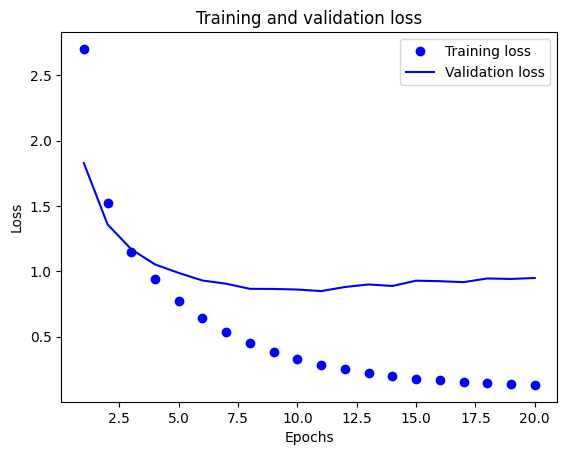

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

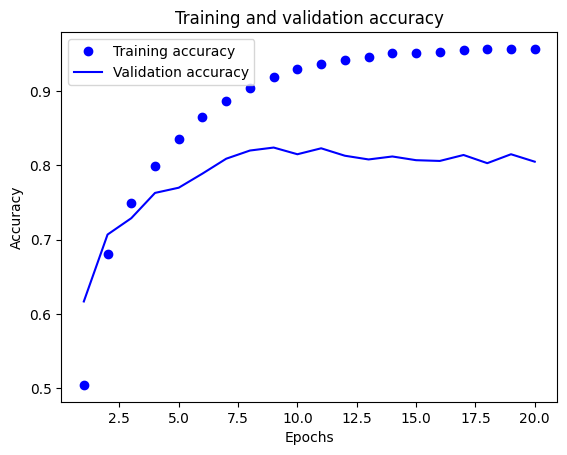

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model


In [ ]:
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0601 - accuracy: 0.7881


In [ ]:
results

[1.0600718259811401, 0.7880676984786987]

## **PART 2**

#### **Part 2.1 - Required Tasks:**

**2.1.1**

>What type of preprocessing was applied to the raw input data? Why was it necessary to do so?


 The raw input data and labels were preprocessed using vectorization (vectorize_sequences) and one-hot encoding (to_one_hot). This is done because models better deal with data in the form of tensors better than just lists of numbers.

**2.1.2**

>How many categories are there in this case?

 There are 46 catergories in this case.

**2.1.3**

>Does your model suffer from overfitting? If so, what would you suggest doing about it?

The model does suffer from overfitting. We can reduce overfitting by reducing the complexity of the model, e.g., reducing the number of neurons in each layer. We can also stop early which means to stop the training as soon as we reach the "sweet spot" before the model starts to overfit and "memorize" the training data. We can also train for fewer epochs as overfitting can occur when you train a model for too long.

**2.1.4**

>Is accuracy a good metric of success in this case? Why (not)?

 Accuracy is not a good metric of success in this case because there are 46 different categories and some of them have more articles than others, making this a multiclass classification problem with imbalanced classes. In this case it would be more informative to use metrics like precision, F1-score, or a confusion matrix ( my personal favorite ). These can help us see the performance details accross multiple classes and how well the model is actually doing on classifying each individual class.

#### **Part 2.2**

 **2.2.1**

Write code to try different combinations of:
- numbers of hidden layers
- units per layer

> Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your hidden layers and units per layer code here and in additional cells as needed

### Generating predictions on new data

In [ ]:
predictions = model2.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

## **PART 3 - Regression for house price estimation using the Boston Housing Price dataset**

### The Boston Housing Price dataset

**WARNING**: This dataset has an ethical problem: [the authors of this dataset included a variable, "B", that may appear to assume that racial self-segregation influences house prices](http://lib.stat.cmu.edu/datasets/boston).

I've decided to keep it in this Project to provide an early concrete example of fairness, bias, and related ethical issues in data science, machine learning, deep learning, and AI.

#### Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building the model

#### Model definition

In [ ]:
def build_model3():
    model3 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model3

### Validating your approach using K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    model3.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.029883861541748, 2.501004219055176, 2.4353294372558594, 2.40948224067688]

In [ ]:
np.mean(all_scores)

2.3439249396324158

#### Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

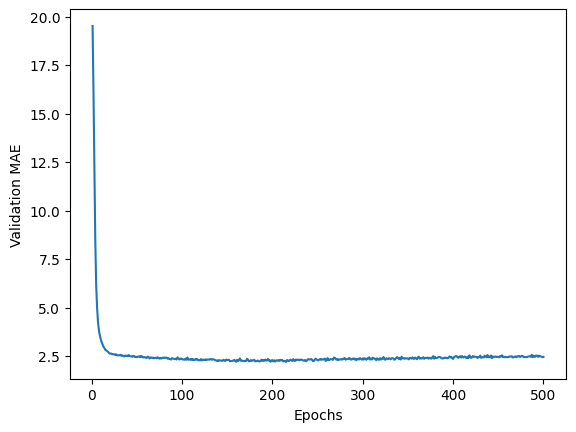

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

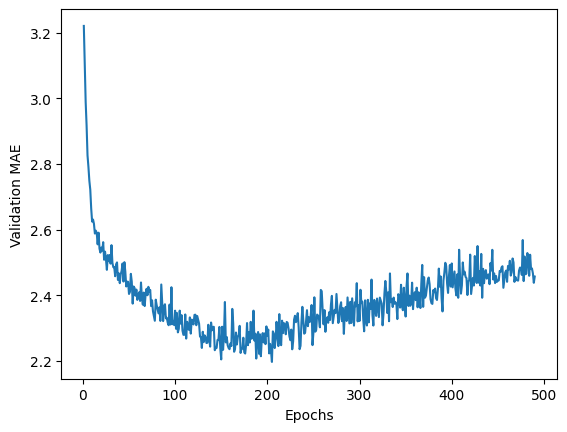

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [ ]:
model3 = build_model3()
model3.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model3.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 8ms/step - loss: 15.4481 - mae: 2.5996


In [ ]:
test_mae_score

2.599578619003296

### Generating predictions on new data

In [ ]:
predictions = model3.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 6ms/step


array([9.208183], dtype=float32)

## **PART 3**

#### **Part 3.1**

 **3.1.1**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

 The type of preprocessing that was applied is refered to as feature-wise normalization. This math produces "...feature(s) centered around 0 and have a unit standard deviation" -- Chollet. This is applied because the values were very different ranges and the this makes learning easier for the model even though the model might be able to automatically adapt to such heterogenoeous data. Overall you could say that machine learning algorithms perform better when numerical input values are scaled to a standard range. It also helps prevent certain features from dominating others.

 **3.1.2**

   >Why is this problem a case of regression (rather than classification)?

 This problem is a case of regression because what we are trying to predict, the housing price, is continuous value not a discrete label like the two previous examples.

 **3.1.3**

   >Does your model suffer from overfitting? If so, what would you suggest doing about it?

 This model does suffer from overfitting. We see from the validation MAE graph that the model begings to overfit after approximately 120-140 epochs. Knowing this we could try early stopping around that point to help improve the models performance. We could also reduce complexity where we can which is not much in this instance as the model is not too complex and we can maybe use more data if possible because it can help the model to generalize better.

 **3.1.4**

   >Is mean absolute error (MAE) a good metric of success in this case? Why
(not)?

 Mean absolute error can be a good choice because it is a simple to understand metric. MAE also only measures the magnitude of the errors which means the lower the MAE the higher the precision of the predictions which make the model more reliable. This is good for measuring model improvement as we make modifications to it. If it results in a lower MAE, then you can be confident that the model is learning and improving.

#### **Part 3.2**

 **3.2.1**

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

## PART 4 CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.

The most common types of machine learning tasks on vector data are binary classification, multiclass classification, and scalar regression. Regresssion uses different loss functions and evaluation metrics compared to classification tasks. You usually need to preprocess your data before you input it into a neural network. Neural networks tend to overfit the longer they train which makes them perform worse on unseen data.